# Cost-Optimal Task Scheduling in Battery Assisted Mobile Edge Computing

In [289]:
%reload_ext autoreload
%autoreload 2
%aimport src

from src.sp1 import NetworkFlowProblem
import numpy as np

## Baseline

$
\begin{align}
\min_{\mathbf{x}} \quad & \sum_{i}\left[\sum_{j\in\mathcal{B},j\neq i}\frac{p_i c_i^G}{\mu_i}x_{ji} + \sum_{j\in\mathcal{B},j\neq i}\left(c_{ij}-\frac{p_i c_i^G}{\mu_i}\right)x_{ij}\right] \\
s.t. \quad & \sum_{j\in\mathcal{B}, j\neq i} x_{ij}\leq \lambda_i,~i\in\mathcal{B} \\
           & x_{ij}\in\mathbb{N},~i,j\in\mathcal{B},~i\neq j
\end{align}
$

Let 
$$
a_i = \frac{p_i c_i^G}{\mu_i}\quad b_{ij}=\left(c_{ij}-\frac{p_i c_i^G}{\mu_i}\right)
$$
The problem is reformualted as follows.
$
\begin{align}
\min_{\mathbf{x}} \quad & \sum_{i}\left[ \sum_{j\in\mathcal{B}, j\neq i}a_i x_{ji} + \sum_{j\in\mathcal{B}, j\neq i} b_{ij}x_{ij} \right] \\
s.t. \quad & \sum_{j\in\mathcal{B}, j\neq i} x_{ij}\leq \lambda_i,~i\in\mathcal{B} \\
           & x_{ij}\in\mathbb{N},~i,j\in\mathcal{B},~i\neq j
\end{align}
$

<img src="networkflow.png" alt="Drawing" style="width: 600px;"/>

The weight $(u,v)$ from node $u$ to node $v$ follows
$
w_{uv} = a_v + b_{uv} 
$

## Subproblem 1

$
\begin{align}
\min_{\mathbf{x}} \quad & \sum_{i}\left[ \sum_{j\in\mathcal{B}, j\neq i}\left(\frac{p_i c_i^G}{\mu_i} - \frac{p_i\pi_i}{\mu_i}\right)x_{ji} + \sum_{j\in\mathcal{B}, j\neq i} \left(c_{ij} - \frac{p_i c_i^G}{\mu_i} + \frac{p_i\pi_i}{\mu_i} \right)x_{ij} \right] \\
s.t. \quad & \sum_{j\in\mathcal{B}, j\neq i} x_{ij}\leq \lambda_i,~i\in\mathcal{B} \\
           & x_{ij}\in\mathbb{N},~i,j\in\mathcal{B},~i\neq j
\end{align}
$

Let 
$$
a_i = \left(\frac{p_i c_i^G}{\mu_i} - \frac{p_i\pi_i}{\mu_i}\right) \quad b_{ij} = \left(c_{ij} - \frac{p_i c_i^G}{\mu_i} + \frac{p_i\pi_i}{\mu_i} \right)
$$
The problem is reformualted the same as the baseline. 


## Subproblem 2

$$
\forall i\in\mathcal{B}  \quad \min_{P\geq 0} \sum_{i}\left[ \alpha \left(\frac{P}{P_i^S}\right)^{k_p} - P(c_i^G-c_i^D-\pi_i) \right]
$$

Define
$$
g(P) = \alpha \left(\frac{P}{P_i^S}\right)^{k_p} - P(c_i^G-c_i^D-\pi_i)
$$
Let
$$
a_{i} = \frac{\alpha}{(P_i^S)^{k_p}}\quad b_i = (c_i^G-c_i^D-\pi_i)
$$
Then 
$$
g(P) = a_i P^{k_p} -b_i P
$$
And 
$$
g'(P) = a_i k_p P^{k_p-1} - b_i
$$

Therefore
$$
P^{*} = \left\{
\begin{array}{ll}
\left(\frac{b_i}{a_i k_p}\right)^{\frac{1}{k_p-1}} & b_i \geq 0 \\
 0 & \text{otherwise}
\end{array}\right.
$$


In [541]:
N = 20

lam = np.random.uniform(low=20, high=50, size=N).round()
mu = np.random.uniform(low=1, high=5, size=N).round()
p = np.ones(N) 
cG = np.ones(N)
cD = np.ones(N) / 3
C = np.ones((N,N)) / 5
alpha = 0.2
kp = 2
pS = np.ones(N) * 50

In [542]:
from src.optimization import Problem
problem = Problem(alpha=alpha, kp=kp, lam=lam, mu=mu, p=p, cG=cG, cD=cD, pS=pS, C=C)

Baseline objective = 1747.9333333333332


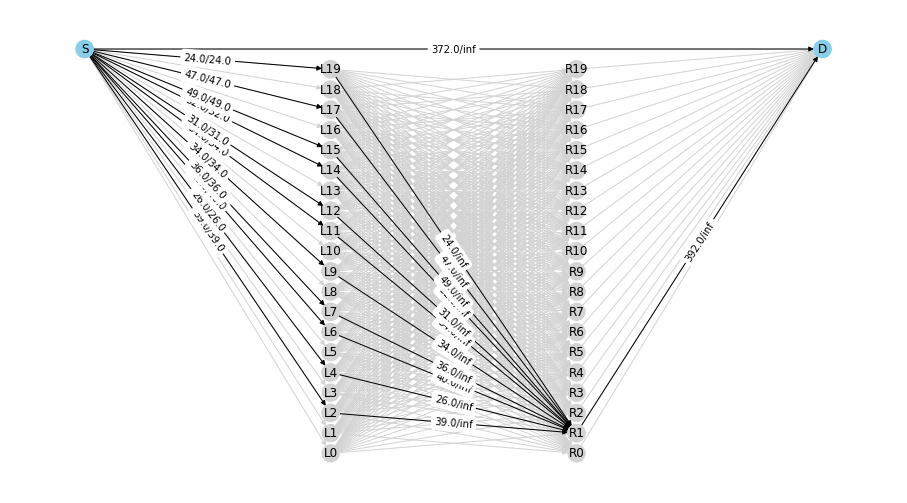

In [543]:
weights_baseline = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        weights_baseline[i][j] = (p[j]*cG[j]/mu[j]  + C[i][j] - p[i]*cG[i]/mu[i])

baseline_problem = NetworkFlowProblem(arrival_rates=lam, weights = weights_baseline)
min_cost, _ = baseline_problem.solve()
baseline_problem.visualize_flow()
X_baseline = baseline_problem.X
pD_baseline = np.zeros(N)

obj_baseline = problem._objective_function(pD=pD_baseline, X=X_baseline)

print(f'Baseline objective = {obj_baseline}')

In [544]:
obj, _, _ =problem.optimize(max_iter=20)

Iteration 1
	 SP1 solved
	 SP2 solved
	 best_dual=0.0, dual=0.0, iter_rate=2
Iteration 2
	 SP1 solved
	 SP2 solved
	 best_dual=1628.6738094222221, dual=1628.6738094222221, iter_rate=2
Iteration 3
	 SP1 solved
	 SP2 solved
	 best_dual=1628.6738094222221, dual=1628.6738094222221, iter_rate=2
Iteration 4
	 SP1 solved
	 SP2 solved
	 best_dual=1628.6738094222221, dual=1628.6738094222221, iter_rate=2
Iteration 5
	 SP1 solved
	 SP2 solved
	 best_dual=1628.6738094222221, dual=1628.6738094222221, iter_rate=2
Iteration 6
	 SP1 solved
	 SP2 solved
	 best_dual=1628.6738094222221, dual=1628.6738094222221, iter_rate=2
Iteration 7
	 SP1 solved
	 SP2 solved
	 best_dual=1628.6738094222221, dual=1628.6738094222221, iter_rate=2
Iteration 8
	 SP1 solved
	 SP2 solved
	 best_dual=1628.6738094222221, dual=1628.6738094222221, iter_rate=2
Iteration 9
	 SP1 solved
	 SP2 solved
	 best_dual=1628.6738094222221, dual=1628.6738094222221, iter_rate=2
Iteration 10
	 SP1 solved
	 SP2 solved
	 best_dual=1628.67380942222

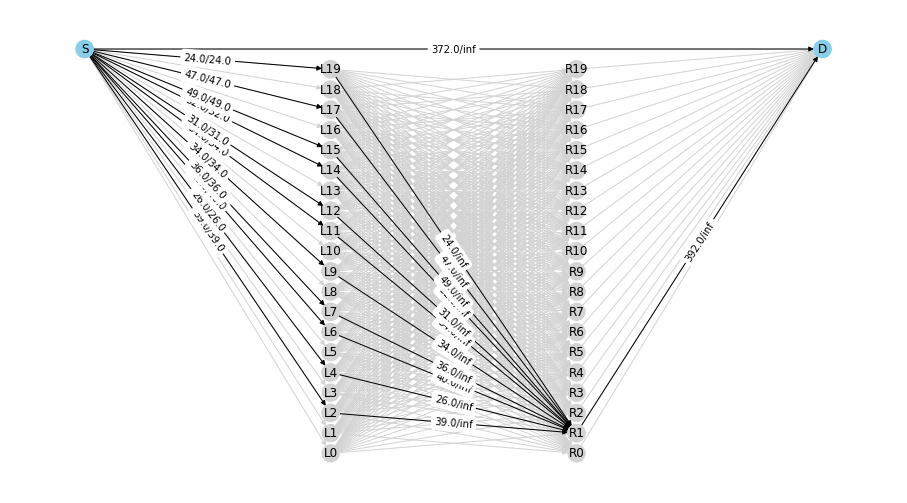

In [545]:
problem.subproblem_1.visualize_flow()